In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom  

In [3]:
df = pd.read_csv('cwurData.csv')


In [4]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [5]:
df = df.drop('institution', axis=1)
df = df.drop('country', axis=1)
df = df.drop('broad_impact', axis=1)
df = df[df['year'] == 2015]
df


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
1200,1,1,1,1,1,1,1,1,3,100.00,2015
1201,2,2,9,2,4,5,3,3,10,98.66,2015
1202,3,3,3,11,2,15,2,2,1,97.54,2015
1203,4,1,2,10,5,11,6,12,48,96.81,2015
1204,5,2,7,13,10,7,12,7,15,96.46,2015
...,...,...,...,...,...,...,...,...,...,...,...
2195,996,7,367,567,218,926,845,812,816,44.03,2015
2196,997,4,236,566,218,997,908,645,871,44.03,2015
2197,998,18,367,549,218,830,823,812,824,44.03,2015
2198,999,40,367,567,218,886,974,812,651,44.02,2015


In [6]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values  

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))  
X = sc.fit_transform(X)  

In [52]:
som = MiniSom(50, 50, input_len = 10, sigma = 1.0, learning_rate = 0.5, neighborhood_function='gaussian')  
som.random_weights_init(X)  
som.train_random(data = X, num_iteration = 3000)  

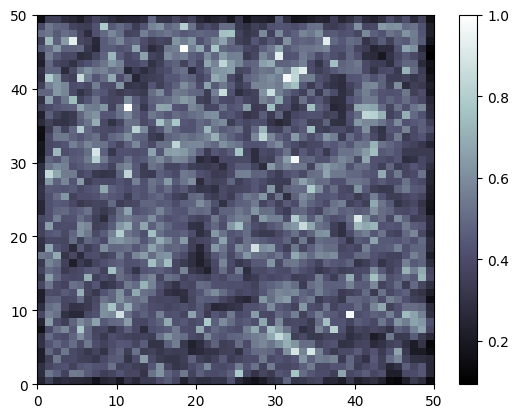

In [56]:
from pylab import bone, pcolor, colorbar, plot, show  
bone()  
pcolor(som.distance_map().T)  
colorbar()  

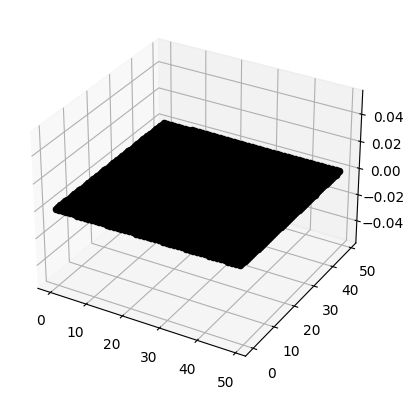

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, j, k in np.ndindex(50, 50, 1):
    ax.scatter(i, j, k, c=som._weights[i, j, k])
plt.show()